##1.2 A sphere example
###Phil Wilkes (UCL/NCEO) <a href=mailto:p.wilkes@ucl.ac.uk>p.wilkes@ucl.ac.uk</a>

This example follows on from the installation of librat and assumes you have librat up and running.

Here we are going to create height map looking down on a sphere. When you've finished it should look something like this.

![what we will create](sphere.png)

In [2]:
import os
import platform

In [2]:
# Just in case you haven't already added neccessary variables to environment variables
os.environ['BPMS'] = os.path.join(os.path.expanduser("~"), 'bpms')
os.environ['PATH'] += os.path.join(os.environ['BPMS'], 'bin/x86_64')
os.environ['PATH'] += os.path.join(os.environ['BPMS'], 'bin/csh')

if platform.system() == 'Darwin': # A Mac:
    os.environ['DYLD_LIBRARY_PATH'] = os.path.join(os.environ['BPMS'], 'src/lib')
else:
    os.environ['LD_LIBRARY_PATH'] = os.path.join(os.environ['BPMS'], 'src/lib')

##Files required to run librat

Librat uses a series of text files to run, the files required for this example are already in the .zip file:
- a <code><span style="background-color: lightgrey">.obj</span></code> of a sphere.  This contains the scence geometry (e.g. ground, leaf, etc.) and references to the "materials" used to model the scene elements.
- a <code><span style="background-color: lightgrey">.matllib</span></code> file that contains paths to the "materials" you want to reprsent in your scene (called <code><span style="background-color: lightgrey">materials.mattlib</span></code> available <a href=http://librat.wikispaces.com/file/view/test0.obj>here</a>).  In this case this points to one material called "white".
- a <code><span style=background-color: lightgrey>.dat</span></code> file containing the reflectance values of the material (called <code><span style="background-color: lightgrey">white.dat</span></code> available <a href=http://librat.wikispaces.com/file/view/test0.obj>here</a>).

The contents of <code><span style="background-color: lightgrey">test0.obj</span></code> are this (not including comments):
<code>
    mtllib plants.matlib <span style="color:green"><i># points at the correct materials library file</i></span> 
    usemtl white <span style="color:green"><i># specifies a material to use, in this case for the ground</i></span>
    v 0 0 0 <span style="color:green"><i># vector specifiying ... see here</i></span>
    v 0 0 1 <span style="color:green"><i># vector specifiying ... see here</i></span>
    plane -1 -2 <span style="color:green"><i># vector specifiying ... see here</i></span>
    !{
    usemtl white <span style="color:green"><i># specifies a material to use, in this case for the sphere</i></span>
    !{ <span style="color:green"><i># braces ...</i></span>
    v 0 0 1000 <span style=color:green><i># specifies a material to use, in this case for the sphere</i></span>
    ell -1 30000 30000 1000 <span style="color:green"><i># specifies a material to use, in this case for the sphere</i></span>
    !}
    !}
</code>

The contents of <code><span style="background-color: lightgrey">plants.mattlib</span></code> are this:
<code>
    srm white white.dat
</code>
Here <code>srm</code> stands for "standard reflectance material" with the name <code>white</code> whose reflectance values are stored in the file called <code><span style="background-color: lightgrey">white.dat</span></code>.

The contents of <code><span style="background-color: lightgrey">white.dat</span></code> are this:
<code>
    0 1 
    10000 1
</code>
Column 1 is wavelength (wavelength units are arbitrary, but we usually use nm), column 2 is reflectance for that wavelength. <code><span style="background-color: lightgrey">white.dat</span></code> specifies a reflectance of 1.0 for any wavelength (less than or equal to an arbitrary upper limit 10000).

##Running librat from within Python
As explained previously, librat is normally run from the command line. However, for these examples we are going to call librat from with in Python.

There are a few of different options when running librat, the ones we will be mostly concerned with are 16 (lidar simualtions) and 14 (spectral simulations). Below is the command line syntax for running our simple model.
<p><code>echo 16 0 0 100000 200000 200000 512 512 1 heightmap.hips | start test0.obj</code></p>
<p>The right hand side of the command pipes the model parameters to <code>start</code>, specifically:</p>
<ul>
<p><code>16</code> is the process we want librat to run i.e. a LiDAR simulation.
<p><code>0 0</code> is the view zenith and azimuth
<p><code>100000</code> units...
<p><code>200000 200000</code> ...at an area of, in this case 200000 x 200000
<p><code>512 512</code> with an output image of specified resolution
<p><code>heightmap.hips</code> output filename
</ul>
<p>This is then piped to <code>start</code> using the <code><span style="background-color: lightgrey">test.obj</span></code>

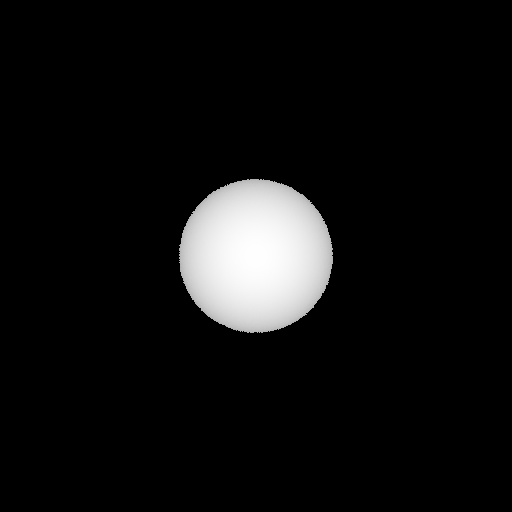

In [6]:
# check the terminal window running iPython for progress
cmd = "echo 16 0 0 100000 200000 200000 512 512 1 heightmap.hips | start test.obj"
os.system(cmd)

# the .hips image can be converted (using ImageMajick) to something that can be displayed here
cmd = "linear < heightmap.hips | hips2pbm > sphere.pbm | convert sphere.pbm sphere1.png"
os.system(cmd)

from IPython.display import Image 
Image(filename='sphere1.png')

# compare this with the image above!

In [4]:
# check the terminal window running iPython for progress
cmd = "echo 16 0 0 100000 200000 200000 512 512 1 heightmap.hips | start test.obj"
os.system(cmd)

# the .hips image can be converted (using ImageMajick) to something that can be displayed here
cmd = "linear < heightmap.hips | hips2pbm > sphere.pbm | convert sphere.pbm sphere1.png"
os.system(cmd)

from IPython.display import Image 
Image(filename='sphere1.png')

'/Users/phil/Dropbox/RMIT/ipython/librat'